In [27]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

import gsw as sw
from mpl_toolkits.basemap import Basemap, cm, interp

In [2]:
# import data

maxlon = 171
minlon = 129

Tok1 = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tokyo1_vSept16.csv', sep = ',')
Tok1['density'] = sw.rho(Tok1['S'].values,Tok1['T'].values,0)
Tok1 = Tok1[(Tok1['Lon']>minlon) & (Tok1['Lon']<maxlon)]

Tok1['dlat'] = np.insert(np.diff(Tok1['Lat']), 0, 0)
Tok1 = Tok1[np.abs(Tok1['dlat'])<0.08]


Tok3 = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tokyo3_vSept16.csv', sep = ',')
Tok3['density'] = sw.rho(Tok3['S'].values,Tok3['T'].values,0)
Tok3 = Tok3[(Tok3['Lon']>minlon) & (Tok3['Lon']<maxlon)]

Tian = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tianjin2_vSept16.csv', sep = ',')
Tian['density'] = sw.rho(Tian['S'].values,Tian['T'].values,0)
Tian = Tian[(Tian['Lon']>minlon) & (Tian['Lon']<maxlon)]

print Tian.columns

Index([u'Timestamp', u'Lat', u'Lon', u'S', u'T', u'Fluo', u'TrueO2Ar',
       u'O2Arsat', u'O2Arbiosat', u'MLD (WOA13)', u'Wkn', u'Air-sea flux',
       u'density'],
      dtype='object')


estimated calibration slope =  0.75079990487 , r =  0.366448680395 , p-value < 0.05  True


/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


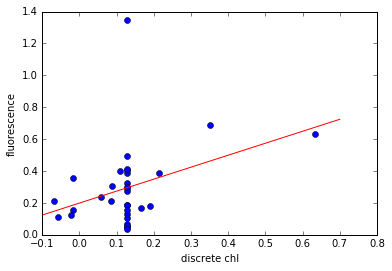

In [33]:
# import calibration data

calib = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Discrete_ChlO2Ar_ForSophie.csv', sep = ',')

subTok1 = calib[calib['Cruise ID']=='Tokyo_1']
subTok1['Fluo'] = np.interp(subTok1['Chlorophyll Date/Time'],Tok1['Timestamp'], Tok1['Fluo'])
subTok1 = subTok1.dropna()

plt.plot(subTok1['Fluo'],subTok1['[Chl] (ug/L)'], 'o')
plt.xlabel('discrete chl')
plt.ylabel('fluorescence')

mT,cT, rT, pT, std_errT = ss.linregress(subTok1['Fluo'],subTok1['[Chl] (ug/L)'])
plt.plot(np.arange(-0.1, 0.8, 0.1), mT*(np.arange(-0.1, 0.8, 0.1))+cT, 'r')

print 'estimated calibration slope = ', mT, ', r = ', rT, ', p-value < 0.05 ', pT<0.05

plt.show()

estimated calibration slope =  0.191463573087 , r =  0.353188428153 , p-value < 0.05  True


/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


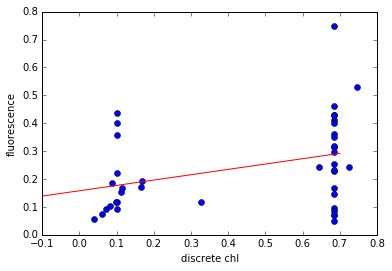

In [35]:
# import calibration data
subTok3 = calib[calib['Cruise ID']=='Tokyo_3']
subTok3['Fluo'] = np.interp(subTok3['Chlorophyll Date/Time'],Tok3['Timestamp'], Tok3['Fluo'])
subTok3 = subTok3.dropna()

plt.plot(subTok3['Fluo'], subTok3['[Chl] (ug/L)'], 'o')
plt.xlabel('discrete chl')
plt.ylabel('fluorescence')

mT,cT, rT, pT, std_errT = ss.linregress(subTok3['Fluo'], subTok3['[Chl] (ug/L)'])
plt.plot(np.arange(-0.1, 0.8, 0.1), mT*(np.arange(-0.1, 0.8, 0.1))+cT, 'r')

print 'estimated calibration slope = ', mT, ', r = ', rT, ', p-value < 0.05 ', pT<0.05

plt.show()

estimated calibration slope =  0.460387384179 , r =  0.233707825993 , p-value < 0.05  False


/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


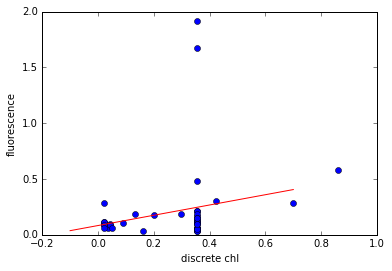

In [36]:
# import calibration data


subT = calib[calib['Cruise ID']=='Tianjin_2']
subT['Fluo'] = np.interp(subT['Date/Time'],Tian['Timestamp'], Tian['Fluo'])
subT = subT.dropna()

plt.plot(subT['Fluo'], subT['[Chl] (ug/L)'],'o')
plt.xlabel('discrete chl')
plt.ylabel('fluorescence')

mT,cT, rT, pT, std_errT = ss.linregress(subT['Fluo'], subT['[Chl] (ug/L)'])
plt.plot(np.arange(-0.1, 0.8, 0.1), mT*(np.arange(-0.1, 0.8, 0.1))+cT, 'r')

print 'estimated calibration slope = ', mT, ', r = ', rT, ', p-value < 0.05 ', pT<0.05

plt.show()